In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
cd /content/drive/MyDrive/Fake_News_Detection

/content/drive/MyDrive/Fake_News_Detection


In [125]:
ls

 Fake.csv   glove.6B.50d.txt  'News _dataset.zip'   True.csv


In [126]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Fake_News_Detection/News _dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


# **Data Processing**

In [127]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict

df_fake = pd.read_csv("Fake.csv")
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [128]:
df_fake = df_fake.drop(['subject','date'],axis=1)

df_fake['label'] = 'Fake'
df_fake.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Fake


In [129]:
df_true = pd.read_csv("True.csv")
df_true = df_true.drop(['subject','date'],axis =1)

df_true['label'] = 'True'
df_true.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,True


In [130]:
df = pd.concat([df_true,df_fake], ignore_index = True)
df.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,True


In [131]:
#shuffling the dataset
df = df.reindex(np.random.permutation(df.index))
df.head()

,title,text,label
4406,Trump accepts Xi's invitation to visit China: ...,BEIJING (Reuters) - U.S. President Donald Trum...,True
5710,"Tillerson calls counterparts from Mexico, Cana...",WASHINGTON (Reuters) - U.S. Secretary of State...,True
42664,HIGH SCHOOL V.P. Warns Students: “Only terrori...,It s a wonder we have any sane children coming...,Fake
31930,“President Trump Fights Fire with Fire” Sarah ...,John Roberts was first to question the tweets ...,Fake
2721,"U.S. outlines NAFTA objectives, includes curre...",WASHINGTON (Reuters) - The United States on Mo...,True


In [132]:
import re 
#function for extracting desired text using regex
def extract_txt(text):
  regex = re.search(r"(?<=\(Reuters\)\s\-\s).*", text)
  if regex:
    return regex.group(0)
  return text

#applying regex function to retain only relevant text
df["text_processed"] = df['text'].apply(extract_txt)

In [133]:
##checking dataframe containing only True News
df[df.label == "True"]

,title,text,label,text_processed
4406,Trump accepts Xi's invitation to visit China: ...,BEIJING (Reuters) - U.S. President Donald Trum...,True,U.S. President Donald Trump accepted his Chine...
5710,"Tillerson calls counterparts from Mexico, Cana...",WASHINGTON (Reuters) - U.S. Secretary of State...,True,U.S. Secretary of State Rex Tillerson called h...
2721,"U.S. outlines NAFTA objectives, includes curre...",WASHINGTON (Reuters) - The United States on Mo...,True,The United States on Monday outlined a tough n...
5484,Burlington to drop Ivanka Trump brand online: ...,(Reuters) - Burlington Stores Inc joined other...,True,"Burlington Stores Inc joined other retailers, ..."
3127,"In Georgia, costliest U.S. House race hits ugl...",ATLANTA (Reuters) - The costliest U.S. congres...,True,The costliest U.S. congressional race in histo...
...,...,...,...,...
19324,Ireland says 'lot of work' needed to move to n...,DUBLIN (Reuters) - Ireland s foreign minister ...,True,Ireland s foreign minister on Friday welcomed ...
6041,White House says draft interrogation order is ...,WASHINGTON (Reuters) - A draft order calling f...,True,A draft order calling for a review of whether ...
1502,NFL protests are protected speech but 'misguid...,WASHINGTON (Reuters) - U.S. House Speaker Paul...,True,U.S. House Speaker Paul Ryan on Thursday said ...
9607,Trump says he would like Speaker Ryan to chair...,"WASHINGTON (Reuters) - Donald Trump, the presu...",True,"Donald Trump, the presumptive U.S. Republican ..."


In [134]:
df

,title,text,label,text_processed
4406,Trump accepts Xi's invitation to visit China: ...,BEIJING (Reuters) - U.S. President Donald Trum...,True,U.S. President Donald Trump accepted his Chine...
5710,"Tillerson calls counterparts from Mexico, Cana...",WASHINGTON (Reuters) - U.S. Secretary of State...,True,U.S. Secretary of State Rex Tillerson called h...
42664,HIGH SCHOOL V.P. Warns Students: “Only terrori...,It s a wonder we have any sane children coming...,Fake,It s a wonder we have any sane children coming...
31930,“President Trump Fights Fire with Fire” Sarah ...,John Roberts was first to question the tweets ...,Fake,John Roberts was first to question the tweets ...
2721,"U.S. outlines NAFTA objectives, includes curre...",WASHINGTON (Reuters) - The United States on Mo...,True,The United States on Monday outlined a tough n...
...,...,...,...,...
23051,WATCH: Will Ferrell Skewers Trump As He Repri...,"Last night, during the official White House Co...",Fake,"Last night, during the official White House Co..."
9607,Trump says he would like Speaker Ryan to chair...,"WASHINGTON (Reuters) - Donald Trump, the presu...",True,"Donald Trump, the presumptive U.S. Republican ..."
43769,"Trump Transition: As Secretary of State, Tulsi...",Patrick Henningsen 21st Century WireSo far as ...,Fake,Patrick Henningsen 21st Century WireSo far as ...
19791,China to amend party constitution at October c...,BEIJING (Reuters) - China s ruling Communist P...,True,China s ruling Communist Party is expected to ...


# **Data Preparation and Cleaning**

In [135]:
df = df.drop(['text'], axis =1)
df

,title,label,text_processed
4406,Trump accepts Xi's invitation to visit China: ...,True,U.S. President Donald Trump accepted his Chine...
5710,"Tillerson calls counterparts from Mexico, Cana...",True,U.S. Secretary of State Rex Tillerson called h...
42664,HIGH SCHOOL V.P. Warns Students: “Only terrori...,Fake,It s a wonder we have any sane children coming...
31930,“President Trump Fights Fire with Fire” Sarah ...,Fake,John Roberts was first to question the tweets ...
2721,"U.S. outlines NAFTA objectives, includes curre...",True,The United States on Monday outlined a tough n...
...,...,...,...
23051,WATCH: Will Ferrell Skewers Trump As He Repri...,Fake,"Last night, during the official White House Co..."
9607,Trump says he would like Speaker Ryan to chair...,True,"Donald Trump, the presumptive U.S. Republican ..."
43769,"Trump Transition: As Secretary of State, Tulsi...",Fake,Patrick Henningsen 21st Century WireSo far as ...
19791,China to amend party constitution at October c...,True,China s ruling Communist Party is expected to ...


In [136]:
df["label"] = df.label.apply(lambda x: 0 if x=="True" else 1)
df

,title,label,text_processed
4406,Trump accepts Xi's invitation to visit China: ...,0,U.S. President Donald Trump accepted his Chine...
5710,"Tillerson calls counterparts from Mexico, Cana...",0,U.S. Secretary of State Rex Tillerson called h...
42664,HIGH SCHOOL V.P. Warns Students: “Only terrori...,1,It s a wonder we have any sane children coming...
31930,“President Trump Fights Fire with Fire” Sarah ...,1,John Roberts was first to question the tweets ...
2721,"U.S. outlines NAFTA objectives, includes curre...",0,The United States on Monday outlined a tough n...
...,...,...,...
23051,WATCH: Will Ferrell Skewers Trump As He Repri...,1,"Last night, during the official White House Co..."
9607,Trump says he would like Speaker Ryan to chair...,0,"Donald Trump, the presumptive U.S. Republican ..."
43769,"Trump Transition: As Secretary of State, Tulsi...",1,Patrick Henningsen 21st Century WireSo far as ...
19791,China to amend party constitution at October c...,0,China s ruling Communist Party is expected to ...


In [137]:
df['final_text'] = df['title'] + " " + df['text_processed']

df = df.drop(['title','text_processed'], axis =1 )
df

,label,final_text
4406,0,Trump accepts Xi's invitation to visit China: ...
5710,0,"Tillerson calls counterparts from Mexico, Cana..."
42664,1,HIGH SCHOOL V.P. Warns Students: “Only terrori...
31930,1,“President Trump Fights Fire with Fire” Sarah ...
2721,0,"U.S. outlines NAFTA objectives, includes curre..."
...,...,...
23051,1,WATCH: Will Ferrell Skewers Trump As He Repri...
9607,0,Trump says he would like Speaker Ryan to chair...
43769,1,"Trump Transition: As Secretary of State, Tulsi..."
19791,0,China to amend party constitution at October c...


In [138]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [139]:
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

def cleantxt(txt):
  #lowercasing
  txt = txt.lower()
  #removing stopwords
  txt = " ".join([word for word in txt.split() if word not in (stop)])
  # removing non-alphabetic characters
  txt = re.sub('[^a-z]',' ',txt)
  return txt

df['final_text'] = df['final_text'].apply(cleantxt)
df.head()

,label,final_text
4406,0,trump accepts xi s invitation visit china xin...
5710,0,tillerson calls counterparts mexico canada s...
42664,1,high school v p warns students only terrori...
31930,1,president trump fights fire fire sarah hucka...
2721,0,u s outlines nafta objectives includes curre...


In [140]:
path = '/content/drive/MyDrive/Fake_News_Detection'

EMBEDDING_FILE=f'{path}/glove.6B.50d.txt'

# configuration setting
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32
EPOCHS = 10


# creating feature and target variable
X = df.drop(['label'],axis=1)
y = df['label'].values

In [141]:
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open(EMBEDDING_FILE) as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec


from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(list(X['final_text']))
X = tokenizer.texts_to_sequences(list(X['final_text']))

# pad sequences so that we get a N x T matrix
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Loading word vectors...
Shape of data tensor: (44898, 100)


In [142]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 115831 unique tokens.


In [143]:
# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [144]:
from keras.layers import Embedding

In [145]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

# **Model Building**

In [146]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input
from keras.layers import GlobalMaxPool1D
from keras.layers import Bidirectional
from keras.models import Model

In [147]:
# create an LSTM network with a single LSTM
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 50)           1000000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 100, 30)          7920      
 nal)                                                            
                                                                 
 global_max_pooling1d_3 (Glo  (None, 30)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,007,951
Trainable params: 7,951
Non-trainab

# **Train Test Split**

In [148]:
from sklearn.model_selection import train_test_split

# train Test split in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

# **Model Fitting**

In [149]:
history = model.fit(X_train, y_train, epochs =10 ,batch_size = 32, validation_split = 0.2)

Epoch 1/10
898/898 [==============================] - 22s 19ms/step - loss: 0.2121 - accuracy: 0.9205 - val_loss: 0.1399 - val_accuracy: 0.9460
Epoch 2/10
898/898 [==============================] - 14s 15ms/step - loss: 0.1168 - accuracy: 0.9588 - val_loss: 0.1022 - val_accuracy: 0.9630
Epoch 3/10
898/898 [==============================] - 14s 15ms/step - loss: 0.0882 - accuracy: 0.9694 - val_loss: 0.0853 - val_accuracy: 0.9695
Epoch 4/10
898/898 [==============================] - 14s 16ms/step - loss: 0.0699 - accuracy: 0.9754 - val_loss: 0.0685 - val_accuracy: 0.9763
Epoch 5/10
898/898 [==============================] - 14s 15ms/step - loss: 0.0574 - accuracy: 0.9798 - val_loss: 0.0619 - val_accuracy: 0.9795
Epoch 6/10
898/898 [==============================] - 16s 18ms/step - loss: 0.0480 - accuracy: 0.9833 - val_loss: 0.0581 - val_accuracy: 0.9802
Epoch 7/10
898/898 [==============================] - 15s 17ms/step - loss: 0.0423 - accuracy: 0.9858 - val_loss: 0.0642 - val_accuracy:

In [150]:
import matplotlib.pyplot as plt

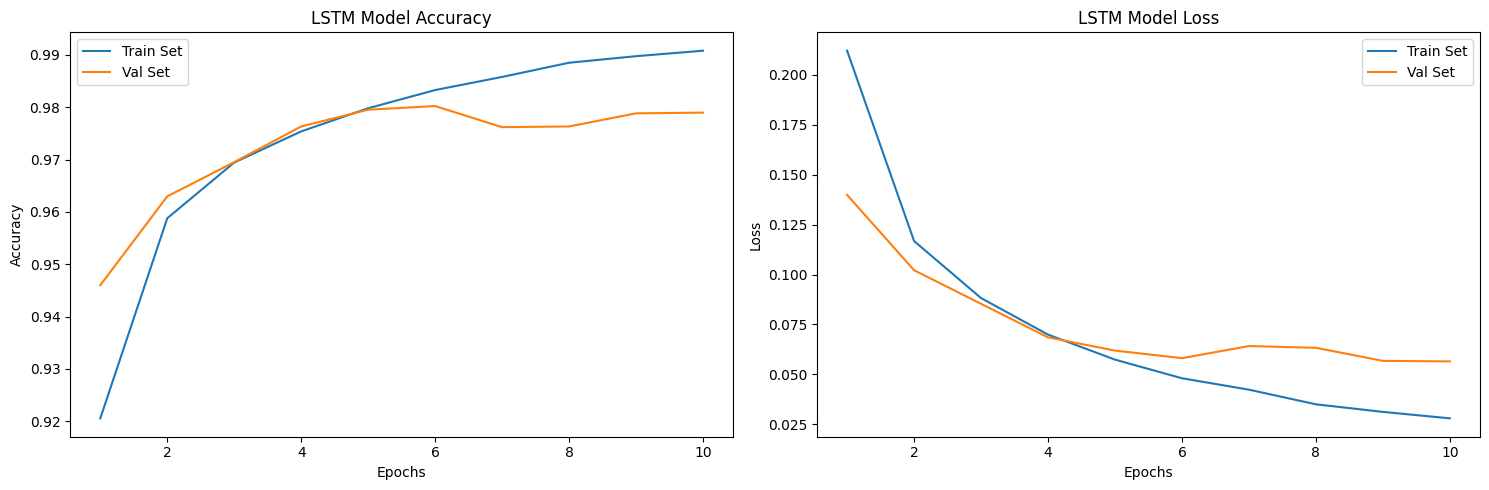

In [151]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Loss')

plt.tight_layout()
plt.show()

In [152]:
tr_acc = model.evaluate(X_train, y_train)
print("Accuracy or the model on Training Data is - ", tr_acc)

te_acc = model.evaluate(X_test,y_test)
print("Accuracy or the model on Testing Data is - ", te_acc)


1123/1123 [==============================] - 7s 7ms/step - loss: 0.0295 - accuracy: 0.9908
Accuracy or the model on Training Data is -  [0.029479293152689934, 0.9908402562141418]
281/281 [==============================] - 2s 6ms/step - loss: 0.0469 - accuracy: 0.9837
Accuracy or the model on Testing Data is -  [0.04689837247133255, 0.9837416410446167]


In [153]:
#make prediction
pred = model.predict(X_test)

281/281 [==============================] - 2s 5ms/step


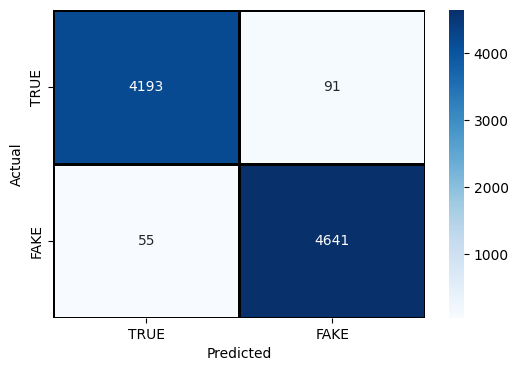

In [154]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [155]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4284
           1       0.98      0.99      0.98      4696

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [156]:
testSent =["Trey Gowdy destroys this clueless DHS employee when asking about the due process of getting on the terror watch list. Her response is priceless:  I m sorry, um, there s not a process afforded the citizen prior to getting on the list.  ",
       "Poland s new prime minister faces a difficult balancing act trying to repair bruised relations with the European Union without alienating the eurosceptic government s core voters. A Western-educated former banker who is fluent in German and English and was sworn in on Monday, Mateusz Morawiecki boasts the credentials needed to negotiate with Brussels. But any compromises to improve relations with Brussels, which sees the ruling Law and Justice (PiS) party as a threat to democracy, would risk upsetting the traditional, Catholic supporters who propelled it into power two years ago. It is a gamble that could backfire, and it is not yet clear how far Morawiecki, 49, and his party, dominated by former Prime Minister Jaroslaw Kaczynski, are ready to go to please Brussels.   The idea to build up international credibility seems rational,  said Jaroslaw Flis, a sociologist at the Jagiellonian University.  But such actions would have to be in complete contrast with what Mateusz Morawiecki would have to do domestically to prevent the PiS from falling apart."
      ]

def predict_text(lst_text):
    test = tokenizer.texts_to_sequences(testSent)
    # pad sequences so that we get a N x T matrix
    testX = pad_sequences(test, maxlen=MAX_SEQUENCE_LENGTH)
    prediction = model.predict(testX)
    df_test = pd.DataFrame(testSent, columns = ['test_sent'])

    df_test['prediction']=prediction
    df_test["test_sent"] = df_test["test_sent"].apply(cleantxt)
    df_test['prediction']=df_test['prediction'].apply(lambda x: "Fake" if x>=0.5 else "Real")
    return df_test

#getting the prediction by passing list of sample news articles
df_testsent = predict_text(testSent)
df_testsent

1/1 [==============================] - 0s 27ms/step


,test_sent,prediction
0,trey gowdy destroys clueless dhs employee aski...,Fake
1,poland new prime minister faces difficult bala...,Real
